### 1. Центральная предельная теорема

Одна из задач статистики: по выборке сделать выводы о генеральной совокупности

In [74]:
#импорт библиотек
from scipy import stats as sts
import numpy as np
from matplotlib import pyplot as plt

Создадим Генеральную совокупность

In [75]:
np.random.seed(0) #фиксируем идемпотентый рандом

mu = 80
sigma = 15
norm_rv = sts.norm(loc=mu, scale=sigma) #задаем параметры распределения
X = norm_rv.rvs(size=100000)

In [76]:
#предположим X - это генеральная совокупность. В этом примере генеральная совокупность распределена нормально, на практике чаще не так. 
#округлим каждое значение до целого числа
X = [int(np.round(i,0)) for i in X]

In [77]:
X[:10]

[106, 86, 95, 114, 108, 65, 94, 78, 78, 86]

In [78]:
#среднее генеральной совокупности ~ 80
np.mean(X)

80.02364

In [79]:
#стандартное отклонение ~ 15
np.std(X)

14.962424307257162

Предположим, что у нас есть выборка из генеральной совокупности

In [80]:
np.random.seed(0) #фиксируем идемпотентый рандом

sample = np.random.choice(X, size=1000, replace=False)

In [83]:
#среднее выборки
np.mean(sample)

80.101

Cреднее выборки тоже ~ 80. Но мы не можем просто взять среднее выборки и сказать, что среднее генеральной совокупности равно среднему выборки. Давайте разбираться почему.

Возьмем 300 рандомных выборок из ГС по 1000 элементов и посчитаем для каждой выборки среднее

In [84]:
np.random.seed(0) #фиксируем идемпотентый рандом

list_means = []
for i in range(300):
    some_sample = np.random.choice(X, size=1000, replace=False)
    list_means.append(np.round(np.mean(some_sample),2))

Отобразим распределение средних выборок (выборочных средних)

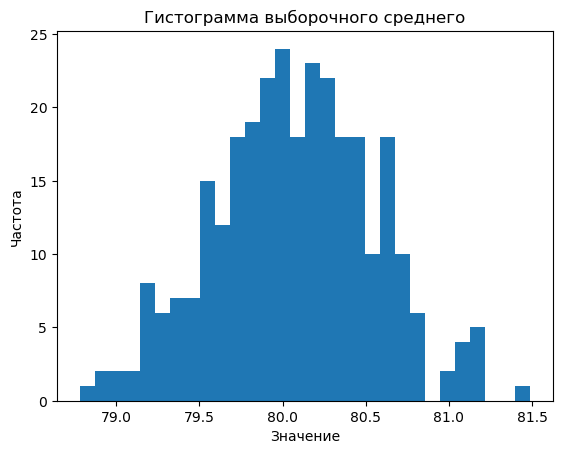

In [85]:
# Визуализация гистограммы
plt.hist(list_means, bins=30)

# Отображение графика
plt.title('Гистограмма выборочного среднего')
plt.xlabel('Значение')
plt.ylabel('Частота')
plt.show()

Что мы видим:</br>
1. Что распределение выборочных средних распределено нормально. Работает центральная предельная теорема ЦПТ </br>
2. Чаще средее выборок лежит рядом с средним генеральной совокупности. Чем ближе к среднему ГС, тем выше плотность </br>
3. Есть средние, которые прилично отличаются от среднего ГС. 


В реальной жизни у нас нет возможности получить много выборок. Обычно у нас есть одна выборка, и с помощью одной выборки нужно сделать выводы о ГС. Но нам может попасться как выборка, которая хорошо отражает ГС, так и выборка, которая сильнее отличается от ГС.

In [86]:
list_means[0]#первое выборочное среднее

80.1

In [87]:
min(list_means)#минимальное выборочное среднее

78.78

In [88]:
max(list_means)#максимальное выборочное среднее

81.49

**Центральная предельная теорема:** Если многократно извлекать выборки из генеральной совокупности, то выборочные средние (средние всех выборок) будут распределены нормально с стандартным отклонением, которое расчитывается по формуле:

$ SE  = \frac{\sigma}{\sqrt{n}} $ <br/> <br/>
где:<br/>
$SE$ - это стандартное отклонение для распределения выборочных средних. Его еще называют **стандартной ошибкой среднего**;<br/>
$\sigma$ - стандартное отклонение генеральной совокупности;<br/>
$n$ - размер выборки.

Заметки о ЦПТ:
1. При увеличении размера выборки уменьшается SE
2. При увеличении размера выборки оценка среднего становится точнее
3. При увеличении стандартного отклонения генеральной совокупности SE увеличивается
4. В среднем средние выборок будут стремиться к истинному среднему значению генеральной совокупности 

Но в жизни у нас нет возможности взять много выборок, выборка у нас одна. Тогда как раз и на помощь приходит ЦТП

In [89]:
np.std(X)/(1000**0.5)

0.47315340128799666

In [90]:
np.std(list_means)

0.47982438454084386

### 2. Тестирование гипотез

Тестирование гипотез - это метод статистики, который позволяет проверить гипотезу

#### Задача:
Дупустим у нас есть выборка. Мы можем посчитать среднее выборки, но мы не знаем среднее ГС. У нас есть лишь предположение о том, что среднее генеральной совокупности = 80. <br><br>
Необходимо проверить  по выборке, что среднее ГС = 80.<br><br>
В статистике придерживаются такого подхода: мы верим в гипотезу, пока не докажем что она не верна. То есть мы верим, что среднее ГС = 80, пока не докажем обратное.

Нулевая гипотеза $H_0$: среднее генеральной совокупности = 80

Альтернативная гипотеза $H_1$: среднее генеральной совокупности != 80

Что известно:

In [91]:
#известно среднее выборки
m = np.mean(sample)
print(m)

80.101


In [92]:
#известно стандартное отклонение ГС
#предположим что мы знаем стандартное отклонение для ГС, но не знаем среднего ГС. 
#Пример теоретический, так как на практике мы не знаем о ГС ничего.
sigma = np.std(X)
print(sigma)

14.962424307257162


In [93]:
#известнен размер выборки
n = len(sample)
print(n)

1000


Расчитаем стандартную ошибку среднего (стандартное отклонение распределенения выборочных средних)

In [94]:
#стандартная ошибка среднего
se = sigma/(len(sample)**0.5)
print(se)

0.47315340128799666


**Стандартизация или z-преобразование**

Cтандартизация - это преобразование нормального распределения выборочных средних, которое включает в себя вычитание среднего значения и деление на стандартное отклонение каждого значения в распределении. Это создает новое нормальное распределение выборочных средних, где среднее значение равно 0, а стандартное отклонение равно 1.

$ z  = \frac{\bar{x} - \mu}{SE} $ <br/> <br/>

Т. е. с помощью стандартизации мы преобразуем нормальное распределение в стандартное нормальное распределение.</br>
Всмомним: **Стандартное нормальное распределение** — частный случай нормального распределения, когда  μ=0 ,σ=1

Стандартизируем наше распределение выборочных средних

In [106]:
list_means[:10]

[80.1, 79.35, 80.03, 80.11, 79.59, 79.97, 80.39, 79.2, 79.73, 79.04]

In [96]:
len(list_means)

300

[]

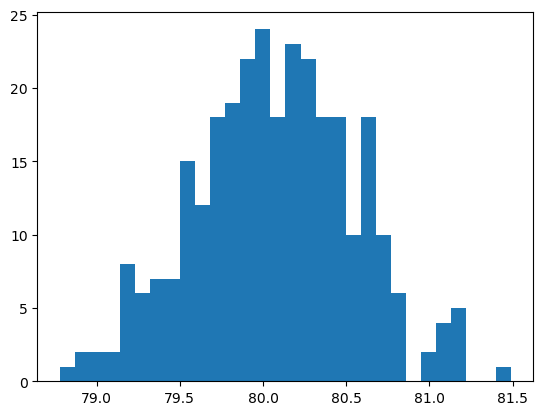

In [97]:
#посмотрим как выглядит распределение выборочных средних
plt.hist(list_means, bins = 30)
plt.plot()

1-й шаг. Отнимаем среднее от каждого элемента выборки

[]

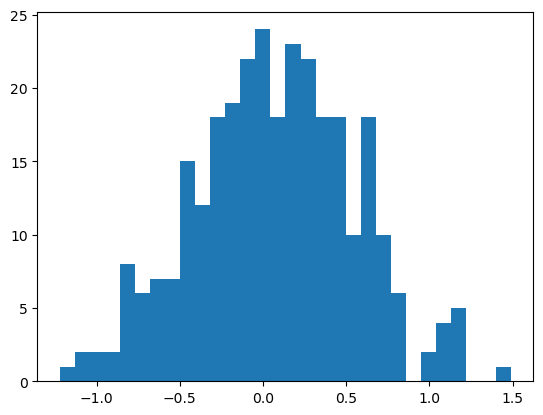

In [98]:
plt.hist(np.array(list_means)-80, bins = 30)
plt.plot()

2-й шаг. делим каждое значение на стандартную ошибку среднего

[]

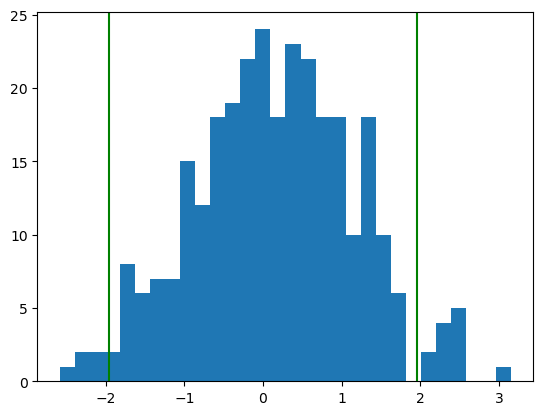

In [99]:
plt.hist((np.array(list_means)-80)/se, bins = 30)
# Добавление вертикальной черты на позиции
plt.axvline(x=1.96, color='g', linestyle='-')
plt.axvline(x=-1.96, color='g', linestyle='-')
plt.plot()

Расчитаем z-статистику для **одного** выборочного среднего. Для выборки **sample** которая у нас реально есть

In [100]:
#z-статистика
z = (m - 80)/se
print(z)

0.2134614265163507


[]

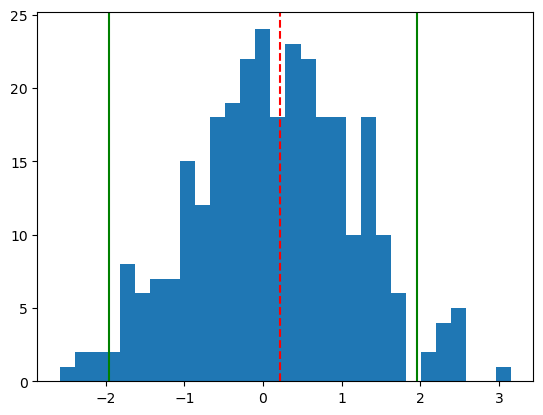

In [101]:
plt.hist((np.array(list_means)-80)/se, bins = 30)
# Добавление вертикальной черты на позиции
plt.axvline(x=z, color='r', linestyle='--')
plt.axvline(x=1.96, color='g', linestyle='-')
plt.axvline(x=-1.96, color='g', linestyle='-')
plt.plot()

**Зависимость значений z-статистики и вероятности**: https://math.arizona.edu/~rsims/ma464/standardnormaltable.pdf

**Нарисуем для наглядности стандартное нормальное распределение и вспомним pdf и cdf**

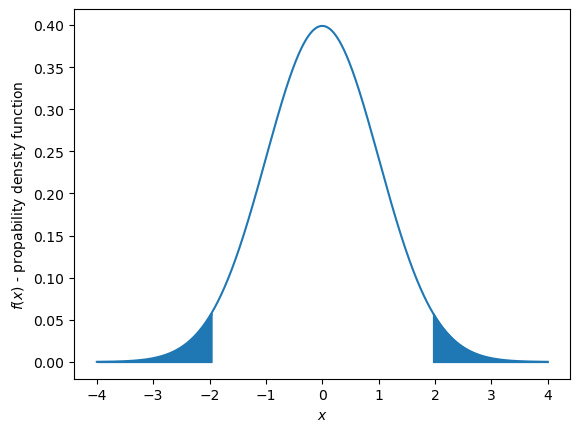

In [102]:
norm_rv = sts.norm(loc=0, scale=1)

x = np.linspace(-4,4,1000) #cоздает массив из 1000 равномерно-распределенных точек. 
pdf = norm_rv.pdf(x)#вычисляем функцию плотности вероятности нормального распределения для каждого значения x

plt.plot(x, pdf, color ='C0')
plt.fill_between(x, pdf, where=(x >= -4) & (x <= -1.96), color ='C0')

plt.fill_between(x, pdf, where=(x >= 1.96) & (x <= 4), color ='C0')

plt.ylabel('$f(x)$ - propability density function')
plt.xlabel('$x$')
plt.show()

In [103]:
norm_rv.cdf(-1.96)

0.024997895148220435

In [104]:
norm_rv.cdf(1.96)

0.9750021048517795

In [105]:
norm_rv.cdf(1.96)-norm_rv.cdf(-1.96)

0.950004209703559

Если z-статистика попадает в 95% площади распределения, тогда мы не можем отклонить нулевую гипотезу. То есть не можем сказать что среднее ГС != 80

-1.96 и 1.96 - называют **критическими значениями**. Это границы, за которыми лежит 5% плотности распределения, 5% вероятности. Отметив критические значения мы установили **уровень значимости $\alpha$**. в нашем случае $\alpha$=0.05</br>

**$\alpha$ - это ошибка первого рода. Ошибка первого рода - это вероятность найти различия там где их нет, то есть отклонить нулевую гипотезу, когда она верна.**

Если бы z-статистика вышла за пределы критических значений, тогда бы мы отклонили нулевую гипотезу - приняли бы бы позицию
, что среднее ГС != 80.